<a href="https://colab.research.google.com/github/robertozerbini/blog/blob/main/Roberto_Zerbini's_Blog_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get Data

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def datetime_tostring(dt):
  return str(dt.year) + '-' + str(dt.month).zfill(2) + '-' + str(dt.day).zfill(2)

!pip install pandas-datareader

In [4]:
#@title Get Data
import pandas_datareader as pdr
from datetime import datetime, timedelta

symbol = 'BTC-USD'
number_of_days =  365#@param {type:"integer"}

t_m1 = datetime.today() 
t_ym1 = t_m1 + timedelta(days=-number_of_days)
bitcoin = pdr.get_data_yahoo(symbols = symbol, start=t_ym1, end=t_m1)

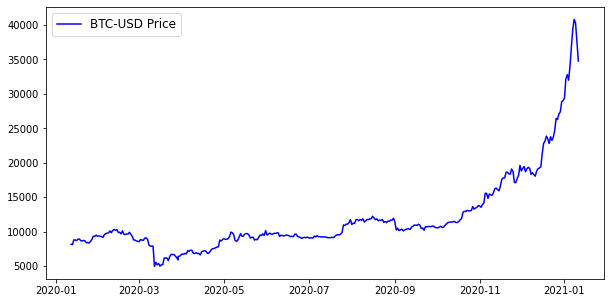

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(bitcoin['Adj Close'], "b-", label = symbol + " Price") 
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [138]:
#@title Set Train Instances
train_days = 340 #@param {type:"integer"}

assert number_of_days>train_days

start_date_training_set = t_ym1
end_date_training_set = t_ym1 + timedelta(days=train_days)
start_date_training_set_shift = start_date_training_set + timedelta(days=1)
end_date_training_set_shift = end_date_training_set + timedelta(days=1)

start_date_test_set = end_date_training_set + timedelta(days=1)
end_date_test_set = np.max(bitcoin.index) + timedelta(days=-1)
start_date_test_set_shift = start_date_test_set + timedelta(days=1)
end_date_test_set_shift = end_date_test_set + timedelta(days=1)


#create test and train sets
X_train = bitcoin['Adj Close'].loc[start_date_training_set:end_date_training_set]
y_train = bitcoin['Adj Close'].loc[start_date_training_set_shift:end_date_training_set_shift]
X_test = bitcoin['Adj Close'].loc[start_date_test_set:end_date_test_set]
y_test = bitcoin['Adj Close'].loc[start_date_test_set_shift:end_date_test_set_shift]

test_dates = X_test.index
train_dates = X_train.index
#number of instances
m = X_train.shape[0]
#number of features
n = 1

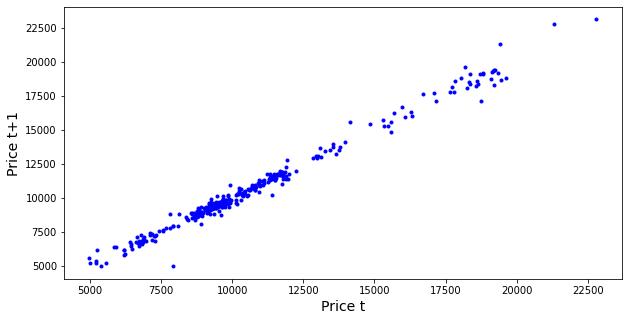

In [40]:
plt.figure(figsize=(10, 5))
plt.plot(X_train,y_train, "b.") 
plt.xlabel('Price t', fontsize=14)
plt.ylabel('Price t+1', fontsize=14)
plt.show()

# Prepare Data

In [139]:
from sklearn.preprocessing import StandardScaler

X_train = np.array(X_train).reshape(m,n)
y_train = np.array(y_train).reshape(m,1)
#scale inputs
scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X_train)

#add bias term
b = np.ones((m,1))
X_scaled = np.append(b,X_scaled,axis=1)

#Batch Gradient Descent

In [106]:
#learning rate
alfa = 0.1

#batch gradient descent
theta_path_bgd = []

#initialize theta
theta = np.zeros(n+1).reshape(n+1,1)

n_epochs = 25

for e in range (n_epochs):
  #cost
  J = (1 / m) * np.sum(np.power(np.dot(X_scaled,theta) - y_train,2))
  #gradient
  dMSE = (2 / m) * np.dot(X_scaled.transpose(),np.dot(X_scaled,theta) - y_train)
  theta = theta - alfa * dMSE
  theta_path_bgd.append(theta)
  print('Epoch: {0} Cost: {1}'.format(e,J))

Epoch: 0 Cost: 125934360.25598425
Epoch: 1 Cost: 80651837.88382119
Epoch: 2 Cost: 51671023.56563681
Epoch: 3 Cost: 33123302.401998814
Epoch: 4 Cost: 21252760.857270487
Epoch: 5 Cost: 13655614.26864436
Epoch: 6 Cost: 8793440.451923644
Epoch: 7 Cost: 5681649.209222387
Epoch: 8 Cost: 3690102.8138935775
Epoch: 9 Cost: 2415513.120883141
Epoch: 10 Cost: 1599775.717356464
Epoch: 11 Cost: 1077703.7790993906
Epoch: 12 Cost: 743577.7386148631
Epoch: 13 Cost: 529737.0727047647
Epoch: 14 Cost: 392879.0465223016
Epoch: 15 Cost: 305289.909765526
Epoch: 16 Cost: 249232.86224118943
Epoch: 17 Cost: 213356.35182561332
Epoch: 18 Cost: 190395.38515964488
Epoch: 19 Cost: 175700.36649342492
Epoch: 20 Cost: 166295.55454704445
Epoch: 21 Cost: 160276.4749013605
Epoch: 22 Cost: 156424.26392812323
Epoch: 23 Cost: 153958.84890525104
Epoch: 24 Cost: 152380.98329061305


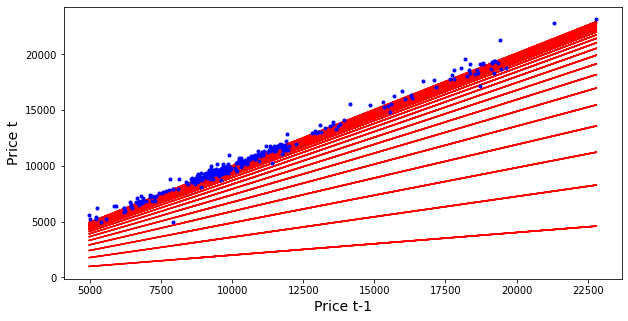

In [19]:
#add bias term
plt.figure(figsize=(10, 5))
for t in range(n_epochs):
  y_hat = np.dot(X_scaled,theta_path_bgd[t])
  plt.plot(X_train,y_hat,'r-')
plt.plot(X_train,y_train, "b.") 
plt.xlabel('Price t-1', fontsize=14)
plt.ylabel('Price t', fontsize=14)
plt.show()

#Stocastic Gradient Descent

In [145]:
#learning rate
alfa = 0.01

#batch gradient descent
theta_path_sgd = []

#initialize theta
theta = np.zeros(n+1).reshape(n+1,1)

n_epochs = 3

for e in range (n_epochs):
  for i in range(m):
    random_ix = np.random.randint(m)
    xi = X_scaled[random_ix].reshape(1,n+1)
    yi = y_train[random_ix].reshape(1,1)
    dMSE = (2) * np.dot(xi.transpose(),np.dot(xi,theta) - yi)
    theta = theta - alfa * dMSE
    theta_path_sgd.append(theta)
  J = (1 / m) * np.sum(np.power(np.dot(X_scaled,theta) - y_train,2))
  print('Epoch: {0} Cost: {1}'.format(e,J))

Epoch: 0 Cost: 149854.21965747792
Epoch: 1 Cost: 152034.92563806448
Epoch: 2 Cost: 159990.88391563704


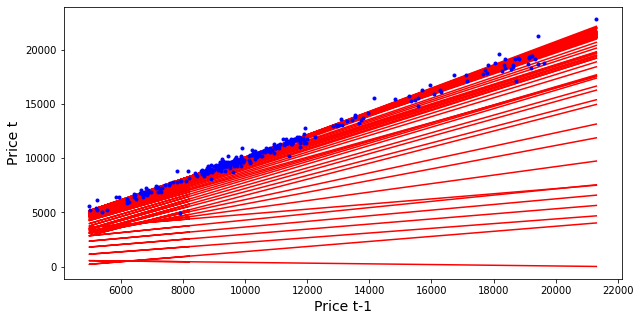

In [57]:
plt.figure(figsize=(10, 5))
for t in range(1,m * n_epochs-1,5):
  y_hat = np.dot(X_scaled,theta_path_sgd[t])
  plt.plot(X_train,y_hat,'r-')
plt.plot(X_train,y_train, "b.") 
plt.xlabel('Price t-1', fontsize=14)
plt.ylabel('Price t', fontsize=14)
plt.show()

#Mini Batch Gradient Descent

In [133]:
#batch gradient descent
theta_path_mbgd = []

#learning rate
alfa = 0.01

#batch_size
batch_size = 32

#epochs
n_epochs = 20
#initialize theta
theta = np.zeros(n+1).reshape(n+1,1)

for e in range (n_epochs):

  for i in range(int(m / batch_size)):
    batch_start = i * batch_size
    batch_stop = batch_start + batch_size
    xi = X_scaled[batch_start:batch_stop].reshape(batch_size,n+1)
    yi = y_train[batch_start:batch_stop].reshape(batch_size,1)
    dMSE = (2/batch_size) * np.dot(xi.transpose(),np.dot(xi,theta) - yi)
    theta = theta - alfa * dMSE
    theta_path_mbgd.append(theta)

  #remaining samples
  xi = X_scaled[batch_stop:m].reshape(m-batch_stop,n+1)
  yi = y_train[batch_stop:m].reshape(m-batch_stop,1)
  dMSE = (2/(m-batch_stop)) * np.dot(xi.transpose(),np.dot(xi,theta) - yi)
  theta = theta - alfa * dMSE
  theta_path_mbgd.append(theta)
  J = (1 / m) * np.sum(np.power(np.dot(X_scaled,theta) - y_train,2))
  print('Epoch: {0} Cost: {1}'.format(e,J))

Epoch: 0 Cost: 75961239.21633175
Epoch: 1 Cost: 46689179.89924745
Epoch: 2 Cost: 28913481.545082808
Epoch: 3 Cost: 18038867.79527755
Epoch: 4 Cost: 11339442.717666637
Epoch: 5 Cost: 7185208.364093035
Epoch: 6 Cost: 4593730.21939463
Epoch: 7 Cost: 2968294.161447594
Epoch: 8 Cost: 1943779.2831498887
Epoch: 9 Cost: 1295208.581189815
Epoch: 10 Cost: 883052.9297161334
Epoch: 11 Cost: 620257.7329238404
Epoch: 12 Cost: 452211.62163348583
Epoch: 13 Cost: 344487.43004376924
Epoch: 14 Cost: 275287.3279845592
Epoch: 15 Cost: 230756.6580519072
Epoch: 16 Cost: 202059.76021501195
Epoch: 17 Cost: 183545.33133627952
Epoch: 18 Cost: 171589.71615667458
Epoch: 19 Cost: 163864.43406349677


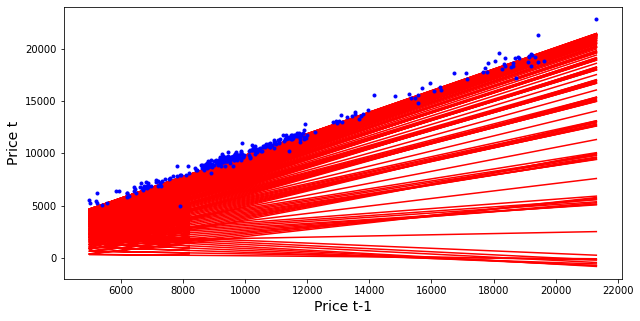

In [134]:
plt.figure(figsize=(10, 5))
for t in range((n_epochs -1) * int(m / batch_size)):
  y_hat = np.dot(X_scaled,theta_path_mbgd[t])
  plt.plot(X_train,y_hat,'r-')
plt.plot(X_train,y_train, "b.") 
plt.xlabel('Price t-1', fontsize=14)
plt.ylabel('Price t', fontsize=14)
plt.show()

# Compare Algorithms

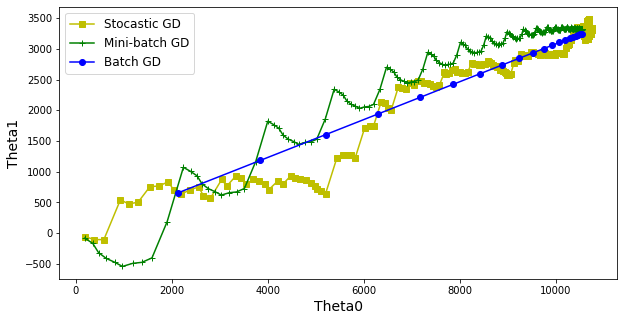

In [71]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mbgd = np.array(theta_path_mbgd)

plt.figure(figsize=(10, 5))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1],'y-s', label = "Stocastic GD")
plt.plot(theta_path_mbgd[:, 0], theta_path_mbgd[:, 1],'g-+', label = "Mini-batch GD") 
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1],'b-o', label = "Batch GD")
plt.xlabel('Theta0', fontsize=14)
plt.ylabel('Theta1', fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

# Let's have some fun predicting Bitcoin price



In [140]:
m = X_test.shape[0]
n = 1

X_test = np.array(X_test).reshape(m,n)
y_test = np.array(y_test).reshape(m,1)

In [141]:
#predict
y_test_hat = np.dot(np.append(b,X_test,axis=1), (theta / scaler.scale_) ) 

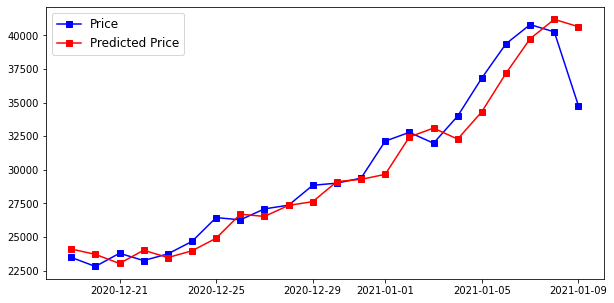

In [142]:
plt.figure(figsize=(10, 5))
plt.plot(test_dates, y_test, "b-s", label = 'Price') 
plt.plot(test_dates, y_test_hat, "r-s", label = 'Predicted Price') 
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [177]:
#average prediction error
np.mean(y_test - y_test_hat)

212.1880184267664

##Predicted Price Tomorrow

In [196]:
import locale
locale.setlocale( locale.LC_ALL, '' )
today_price = float(bitcoin[['Adj Close']].loc[datetime_tostring(t_m1)].to_numpy().reshape(1,-1))
predicted_price = np.dot(np.append(1,[today_price]), (theta / scaler.scale_) ) 
perc_diff = 1 - today_price / float(predicted_price)
print('The predicted Bitcoin price on '+ datetime_tostring(t_m1 + timedelta(days=1)) +' is: ' + locale.currency(predicted_price, grouping=True) + ' (' + "{:.0%}".format(perc_diff)+ ')')

The predicted Bitcoin price on 2021-01-12 is: $35,086.49 (1%)
